In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("../classification/obesity_classification.csv")
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [6]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (108, 7)
Cleaned shape: (108, 7)


In [7]:
print(df_cleaned.dtypes)  
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"{col} unique values: {df_cleaned[col].unique()}")

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object
Gender unique values: ['Male' 'Female']
Label unique values: ['Normal Weight' 'Overweight' 'Underweight' 'Obese']


In [8]:
print(df_cleaned.describe())

               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75%     83.250000   59.250000  190.000000   85.000000   26.100000
max    110.000000  112.000000  210.000000  120.000000   37.200000


/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_59336/532401529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Label', order=df_cleaned['Label'].value_counts().index, palette='Set2')


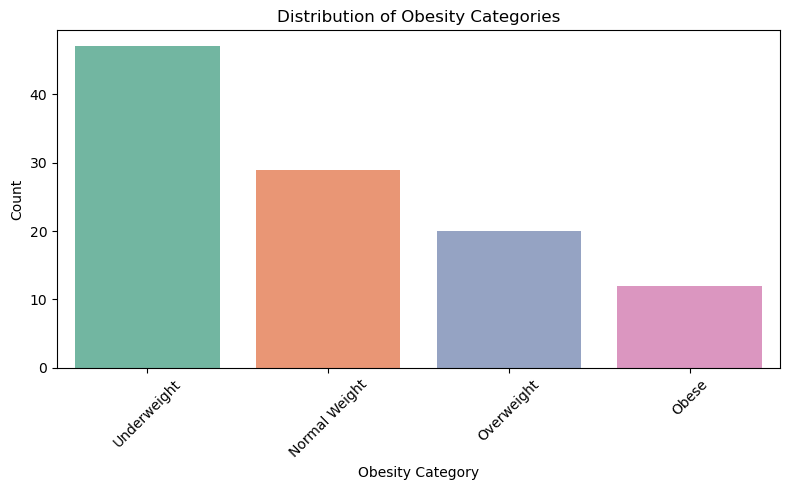

In [9]:
# Box plot - Distribution of Obesity
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='Label', order=df_cleaned['Label'].value_counts().index, palette='Set2')
plt.title("Distribution of Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_59336/3497806352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Label', y='BMI', palette='Set3')


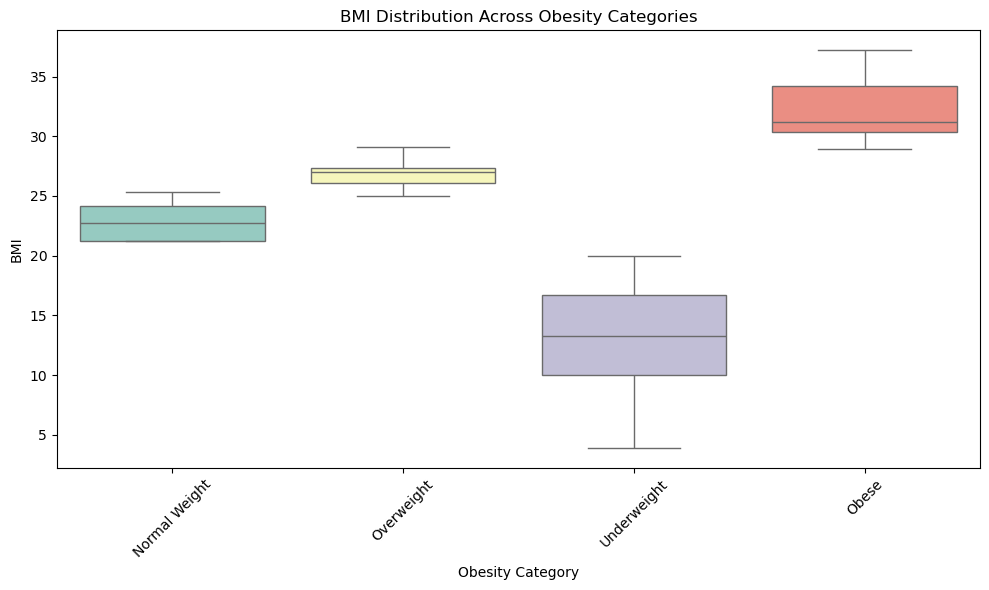

In [10]:
# BMI Distribution to Obesity 
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='Label', y='BMI', palette='Set3')
plt.title("BMI Distribution Across Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

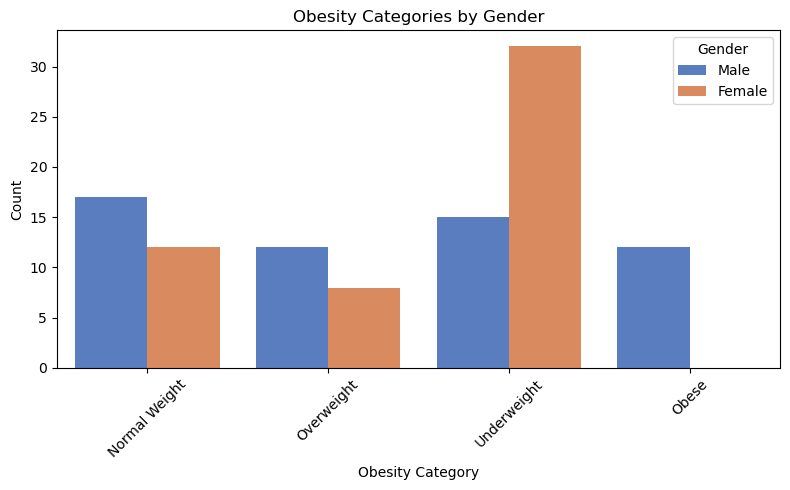

In [11]:
# Box plot - Obesity Categories by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='Label', hue='Gender', palette='muted')
plt.title("Obesity Categories by Gender")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

StandardScaler standardizes the features by removing the mean and scaling to unit variance. This means the transformed data will have a mean of 0 and a standard deviation of 1.

['Normal Weight' 'Normal Weight' 'Obese' 'Underweight' 'Normal Weight'
 'Overweight' 'Normal Weight' 'Overweight' 'Underweight' 'Underweight'
 'Underweight' 'Underweight' 'Normal Weight' 'Underweight' 'Obese'
 'Underweight' 'Obese' 'Overweight' 'Underweight' 'Overweight'
 'Overweight' 'Obese']
Accuracy: 0.9545454545454546
Confusion Matrix:
 [[5 0 1 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 8]]
Classification Report:
                precision    recall  f1-score   support

Normal Weight       1.00      0.83      0.91         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.80      1.00      0.89         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.95        22
    macro avg       0.95      0.96      0.95        22
 weighted avg       0.96      0.95      0.96        22



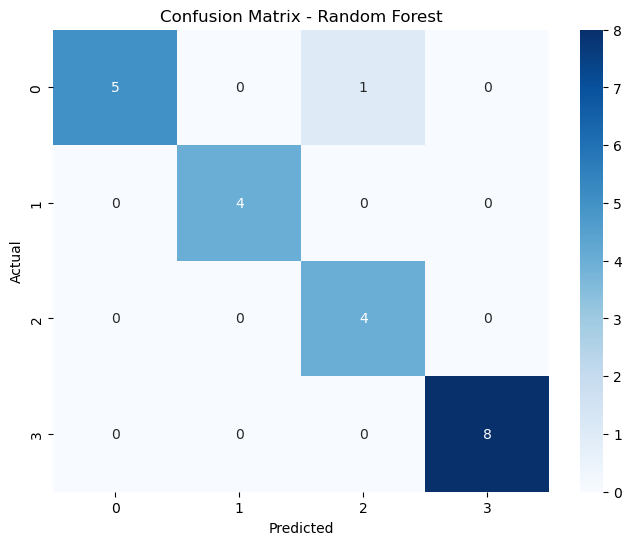

In [26]:
# Feature selection
X = df_cleaned[['Age', 'Gender', 'Height', 'Weight', 'BMI']]
y = df_cleaned['Label']

# One-hot encode 'Gender'
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
print(y_pred)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Accuracy: The model achieves an impressive accuracy of 0.9545, indicating that it correctly classified around 95.45% of the instances in the dataset.

The confusion matrix shows that the model performs exceptionally well, with very few misclassifications:
Class 0: 1 misclassification (predicted as Class 2)
Class 1: Perfect classification (no errors)
Class 2: 1 misclassification (predicted as Class 0)
Class 3: Perfect classification (no errors)

Precision: The model achieves a high precision across all classes, meaning it has a low rate of false positives. Class 1 and Class 3 both have perfect precision (1.00).
Recall: The recall score indicates that the model effectively identifies all true positives in most classes, especially Class 1 and Class 3, where recall is perfect (1.00). Class 0 has a slightly lower recall (0.83), and Class 2 is perfect in recall (1.00).
F1-Score: The F1-score is strong for all classes, with particularly high values for Class 1 and Class 3, reflecting a good balance between precision and recall.
The macro average of 0.95 for precision and 0.96 for recall suggests a well-balanced performance across all classes.
The weighted average of 0.96 for precision and 0.95 for recall also indicates that the model performs well, even when considering class imbalances (though none appear significant in this case).

The model shows excellent classification performance, with a high overall accuracy of 95.45%. It performs particularly well for Class 1 and Class 3, with perfect recall and precision. There are a few minor misclassifications (Class 0 and Class 2), but these are rare and do not significantly affect the overall performance. This model appears to be robust and well-tuned for the task at hand.

In [28]:
# Compare predicted and actual labels
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
print(comparison_df.head(50))  

           Actual      Predicted
0   Normal Weight  Normal Weight
1   Normal Weight  Normal Weight
2           Obese          Obese
3     Underweight    Underweight
4   Normal Weight  Normal Weight
5      Overweight     Overweight
6   Normal Weight  Normal Weight
7      Overweight     Overweight
8     Underweight    Underweight
9     Underweight    Underweight
10    Underweight    Underweight
11    Underweight    Underweight
12  Normal Weight  Normal Weight
13    Underweight    Underweight
14          Obese          Obese
15    Underweight    Underweight
16          Obese          Obese
17     Overweight     Overweight
18    Underweight    Underweight
19     Overweight     Overweight
20  Normal Weight     Overweight
21          Obese          Obese


In [29]:
# Misclassified samples
misclassified = comparison_df[comparison_df["Actual"] != comparison_df["Predicted"]]
print("Misclassified Samples:")
print(misclassified)

Misclassified Samples:
           Actual   Predicted
20  Normal Weight  Overweight


In [31]:
# Predict probabilities for test set
y_proba = rf_model.predict_proba(X_test_scaled)

# Show top 50 prediction confidences
proba_df = pd.DataFrame(y_proba, columns=rf_model.classes_)
proba_df['Predicted'] = y_pred
proba_df['Actual'] = y_test.values
print(proba_df.head(50))

    Normal Weight  Obese  Overweight  Underweight      Predicted  \
0            0.85   0.00        0.13         0.02  Normal Weight   
1            1.00   0.00        0.00         0.00  Normal Weight   
2            0.00   0.66        0.34         0.00          Obese   
3            0.00   0.00        0.00         1.00    Underweight   
4            0.96   0.00        0.04         0.00  Normal Weight   
5            0.25   0.00        0.74         0.01     Overweight   
6            0.96   0.00        0.00         0.04  Normal Weight   
7            0.29   0.00        0.71         0.00     Overweight   
8            0.00   0.00        0.00         1.00    Underweight   
9            0.01   0.00        0.00         0.99    Underweight   
10           0.00   0.00        0.00         1.00    Underweight   
11           0.00   0.00        0.00         1.00    Underweight   
12           0.57   0.00        0.43         0.00  Normal Weight   
13           0.03   0.00        0.00         0.9

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_59336/103256458.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")


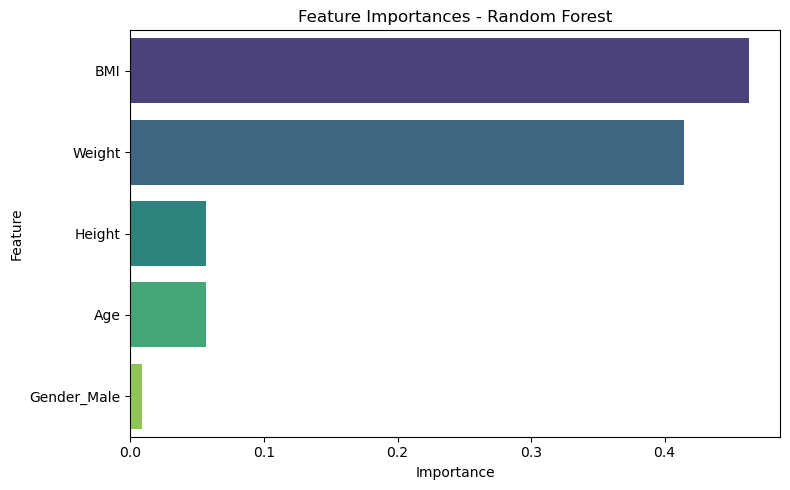

In [13]:
# Get feature importances and feature names
importances = rf_model.feature_importances_
feature_names = X.columns  # Columns used in training

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

Understand which features are most influential in making predictions.

Feature importances in Random Forest give you an invaluable tool for understanding your model and the relationships between input features and predictions. They help improve the interpretability of your model, guide feature selection, and ensure that your model is efficient and focused on the most relevant data, leading to better performance and easier maintenance.

In [17]:
# Use only top 2 features
from sklearn.preprocessing import LabelEncoder

# Re-create the encoder
le = LabelEncoder()
le.fit(df_cleaned['Label'])  # Use your full dataset's Label column

X_top2 = df_cleaned[['BMI', 'Weight']]
y = df_cleaned['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top2, y, test_size=0.2, random_state=42)

# Train model
model_top2 = RandomForestClassifier(n_estimators=100, random_state=42)
model_top2.fit(X_train, y_train)

# Evaluate
y_pred = model_top2.predict(X_test)
print("Accuracy (Top 2 Features):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy (Top 2 Features): 1.0

Classification Report:
                precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22

